In [4]:
import plotly.graph_objects as go
import pretty_midi
import math

from midi_utils.encoding_decoding import get_note_events
import json

In [2]:
def plot_piano_roll(midi_file_path, seed_length=None, width=800, height=400):

    tempi, pitch_counts, note_events = get_note_events(midi_file_path)
    measures = [note_event for note_event in note_events if note_event[0] == 0]
    note_events = [note_event for note_event in note_events if note_event[0] != 0]
    
    x_min = min([note_event[1] for note_event in note_events])
    x_max = max([note_event[1] for note_event in note_events]) + note_events[-1][2]
    y_min = min([note_event[0] for note_event in note_events]) - 2.5
    y_max = max([note_event[0] for note_event in note_events]) + 2.5

    
    fig = go.Figure()

    # add barlines
    for i in [measure[1] for measure in measures][1:]:
        fig.add_shape(
            type='line',
            x0=i,
            y0=y_min,
            x1=i,
            y1=y_max,
            line=dict(
                color='#1258DC',
                width=0.5,
                dash='dot'
            )
        )

    # add notes
    for index, note_event in enumerate(note_events):

        # color the first n=seed_length notes purple
        if not seed_length is None and index+1 <= seed_length:
            color = '#3A004C'
            fillcolor = '#C91BFE'
        else:
            color = '#0A337F'
            fillcolor = '#6395F2'
    
        pitch = note_event[0]
        note_name = pretty_midi.note_number_to_name(pitch)
        note_start = note_event[1]
        duration = note_event[2]
        note_end = note_start + duration

        x0 = note_start
        y0 = pitch-0.5
        x1 = note_end
        y1 = pitch+0.5
        
        fig.add_trace(go.Scatter(
            x=[x0, x1, x1, x0, x0],
            y=[y0, y0, y1, y1, y0],
            mode='lines',
            fill='toself',
            line=dict(color=color, width=1),
            fillcolor=fillcolor,
            text=note_name,
            hoverinfo='text'
        ))


    # set axes ranges and grid
    fig.update_xaxes(
        range=[x_min-0.02, x_max+0.02],
        minallowed=x_min-0.02,
        maxallowed=x_max+0.02,
        showgrid=True,
        gridwidth=1,
        dtick=1,
        showticklabels=False
    )
    fig.update_yaxes(
        range=[y_min, y_max],
        minallowed=y_min,
        maxallowed=y_max,
        showgrid=True,
        gridwidth=1,
        tick0=0.5,
        dtick=1,
        showticklabels=False
    )

    
    fig.update_layout(
        width=width,
        height=height,
        margin=dict(t=0, b=0, l=0, r=0),
        showlegend=False,
        template='plotly_white'
    )
    
    return fig

In [13]:
fig = plot_piano_roll(
    'lach_nice.mid', 
    seed_length=21,
    width=None,
    height=200
)

config = {
    'scrollZoom': False,
    'displaylogo': False,
    'modeBarButtonsToRemove': ['zoomIn', 'zoomOut', 'autoScale', 'toImage']
}

In [14]:
plot_dict_path = 'article_plots.json'

with open(plot_dict_path, 'r') as f:
    plot_dict = json.load(f)

In [16]:
html_string = fig.to_html(full_html=False, include_plotlyjs='cdn', config=config)
plot_dict['midi_roll'] = html_string
with open(plot_dict_path, 'w') as f:
    json.dump(plot_dict, f)

fig.update_layout(
    width=650
)

fig.show(config=config)

In [106]:
from midi_utils.encoding_decoding import get_events

In [107]:
tempi, pitch_counts, duration_counts, events = get_events('lachrimae_first_measures.mid')

In [109]:
print(events)

['MEASURE', 'EVEN', 'NOTE=43', 'DELTA=2.0', 'NOTE=58', 'DELTA=1.5', 'NOTE=62', 'DELTA=1.5', 'NOTE=67', 'DELTA=1.5', 'STEP', 'DELTA=1.0', 'NOTE=55', 'DELTA=0.5', 'STEP', 'DELTA=0.5', 'NOTE=57', 'DELTA=0.5', 'NOTE=65', 'DELTA=0.5', 'STEP', 'DELTA=0.25', 'NOTE=63', 'DELTA=0.25', 'STEP', 'DELTA=0.25', 'NOTE=43', 'DELTA=2.0', 'NOTE=58', 'DELTA=0.5', 'NOTE=62', 'DELTA=0.5', 'STEP', 'DELTA=0.5', 'NOTE=60', 'DELTA=0.5', 'STEP', 'DELTA=0.5', 'NOTE=62', 'DELTA=1.0', 'NOTE=70', 'DELTA=1.0', 'STEP', 'DELTA=1.0', 'MEASURE', 'EVEN', 'NOTE=51', 'DELTA=2.0', 'NOTE=55', 'DELTA=2.0', 'NOTE=63', 'DELTA=1.0', 'STEP', 'DELTA=0.5', 'NOTE=72', 'DELTA=0.25', 'STEP', 'DELTA=0.25', 'NOTE=70', 'DELTA=0.25', 'STEP', 'DELTA=0.25', 'NOTE=69', 'DELTA=0.5', 'STEP', 'DELTA=0.5', 'NOTE=67', 'DELTA=0.5']


In [8]:
import json
import plotly.graph_objs as go

with open('training_history.json', 'r') as file:
    history_1 = json.load(file)

with open('training_history_2.json', 'r') as file:
    history_2 = json.load(file)

with open('training_history_3.json', 'r') as file:
    history_3 = json.load(file)

epochs = list(range(1, 121))
loss = history_1['loss'] + history_2['loss'] + history_3['loss']
val_loss = history_1['val_loss'] + history_2['val_loss'] + history_3['val_loss']


fig = go.Figure()

fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Validation Loss'))

fig.update_layout(
    height=320,
    margin=dict(t=0, b=0, l=0, r=0),
    showlegend=True,
    template='simple_white',
    #title='Neural Network Training History',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    legend=dict(
        x=0.99,
        y=0.99,
        xanchor='right',
        yanchor='top'
    )
)

fig.update_xaxes(range=[0, 125])
fig.update_yaxes(range=[0.35, 2.5])

config = {
    'displayModeBar': False,
    'scrollZoom': False,
    'autosizable': True,
    'responsive': True,
    'showTips': False
}

html_string = fig.to_html(full_html=False, include_plotlyjs='cdn', config=config)
plot_dict['training_history'] = html_string
with open(plot_dict_path, 'w') as f:
    json.dump(plot_dict, f)

fig.update_layout(
    width=450
)

fig.show(config=config)

In [28]:
history_1['val_loss'][-1], history_2['val_loss'][-1], history_3['val_loss'][-1]

(0.5997477173805237, 0.5256475210189819, 0.49240612983703613)

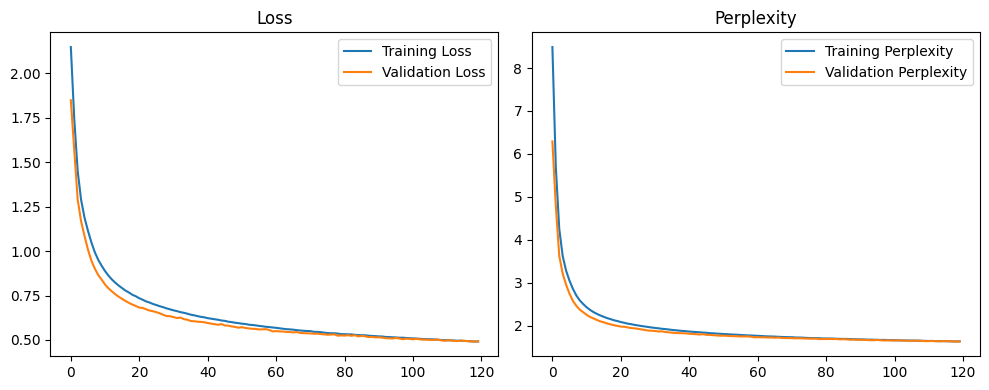

In [28]:
import matplotlib.pyplot as plt

with open('training_history.json', 'r') as file:
    history_1 = json.load(file)

with open('training_history_2.json', 'r') as file:
    history_2 = json.load(file)

with open('training_history_3.json', 'r') as file:
    history_3 = json.load(file)
    

loss = history_1['loss'] + history_2['loss'] + history_3['loss']
val_loss = history_1['val_loss'] + history_2['val_loss'] + history_3['val_loss']

perp = history_1['perplexity'] + history_2['perplexity'] + history_3['perplexity']
val_perp= history_1['val_perplexity'] + history_2['val_perplexity'] + history_3['val_perplexity']

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].legend()
axs[0].set_title('Loss')
axs[1].plot(perp, label='Training Perplexity')
axs[1].plot(val_perp, label='Validation Perplexity')
axs[1].legend()
axs[1].set_title('Perplexity')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()